# Exploratory Data Analysis

In this assignment we will work with data about the Titanic's passengers.

Objectives:
* to familiarize you with the seaborn library
* learn how to build different visualizations
* fill the gaps in the data
* encode categorical data

In [1]:
import pandas as pd
import numpy as np
from matplotlib  import pyplot as plt
import seaborn as sns
%pylab inline

%pylab is deprecated, use %matplotlib inline and import the required libraries.
Populating the interactive namespace from numpy and matplotlib


Let's load the data.

In [2]:
df = pd.read_csv("titanic.csv")

### Task 1
Display the first 7 rows of the table and the table dimensions.

In [3]:
print(df.head(7))

   PassengerId  Survived  Pclass  \
0          1.0       0.0     3.0   
1          2.0       1.0     1.0   
2          3.0       1.0     3.0   
3          4.0       1.0     1.0   
4          5.0       0.0     3.0   
5          NaN       NaN     NaN   
6          7.0       0.0     1.0   

                                                Name     Sex   Age  SibSp  \
0                            Braund; Mr. Owen Harris    male  22.0    1.0   
1  Cumings; Mrs. John Bradley (Florence Briggs Th...  female  38.0    1.0   
2                             Heikkinen; Miss. Laina  female  26.0    0.0   
3       Futrelle; Mrs. Jacques Heath (Lily May Peel)  female  35.0    1.0   
4                           Allen; Mr. William Henry    male  35.0    0.0   
5                                                NaN     NaN   NaN    NaN   
6                            McCarthy; Mr. Timothy J    male  54.0    0.0   

   Parch            Ticket     Fare Cabin Embarked  
0    0.0         A/5 21171   7.2500   NaN

# Feature Processing

1) Find columns that have missing values and process these missing values

2) Translate categorical features into numerical

### Task 2 
Output the basic numerical characteristics of the numerical columns. The method `.describe()` can be very usefull here.

In [4]:
print(df.describe())

       PassengerId    Survived      Pclass         Age       SibSp  \
count   886.000000  886.000000  886.000000  711.000000  886.000000   
mean    448.316027    0.383747    2.305869   29.743094    0.523702   
std     256.211467    0.486572    0.837071   14.505873    1.105202   
min       1.000000    0.000000    1.000000    0.420000    0.000000   
25%     227.250000    0.000000    2.000000   20.750000    0.000000   
50%     448.500000    0.000000    3.000000   28.000000    0.000000   
75%     669.750000    1.000000    3.000000   38.000000    1.000000   
max     891.000000    1.000000    3.000000   80.000000    8.000000   

            Parch        Fare  
count  886.000000  886.000000  
mean     0.375847   32.279387  
std      0.791082   49.817969  
min      0.000000    0.000000  
25%      0.000000    7.903100  
50%      0.000000   14.454200  
75%      0.000000   31.000000  
max      6.000000  512.329200  


The function does not allow you to see if there are missing values in non-numeric columns.

## Process the 'Sex' column

### Task 3
Check if there are missing values in the column.

In [5]:
missinginsex = df['Sex'].isnull().sum()
print("Missing values in 'Sex':", missinginsex)

Missing values in 'Sex': 5


### Task 4
You should get 5 in the previous taks. It is a very small amount. Therefore, we can remove them completely from the dataset. Do it.

In [6]:
df = df.dropna(subset=['Sex'])
print("New Dimensions:", df.shape)

New Dimensions: (886, 12)


The `Sex` feature is categorical, i.e. it contains non-numeric values. For most algorithms to work, it is necessary to map categories into numbers. How can this be done? 

### Task 5 
Encode the categorical features with any method. For example, you can values to 0 and 1, since this feature is binary (the function `.replace` does it).

In [7]:
df['Sex'] = df['Sex'].replace({'male': 0, 'female': 1})
print(df['Sex'].head())

0    0
1    1
2    1
3    1
4    0
Name: Sex, dtype: int64


Let's see how gender affects survival rates.

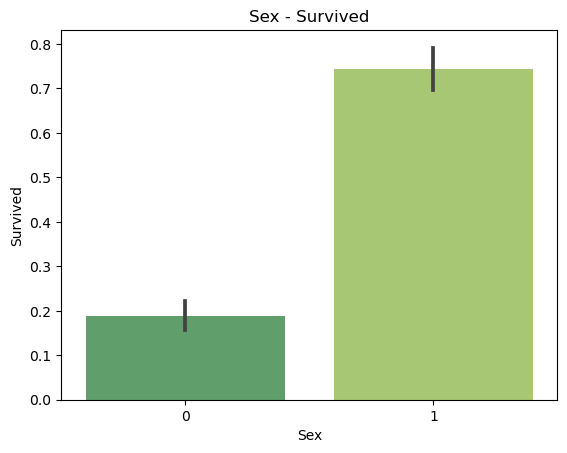

In [8]:
sns.barplot(x='Sex', y='Survived', data=df, palette='summer')
plt.title('Sex - Survived')
plt.show()

Let's see how a person's gender and ticket class (Pclass) affect survival rates

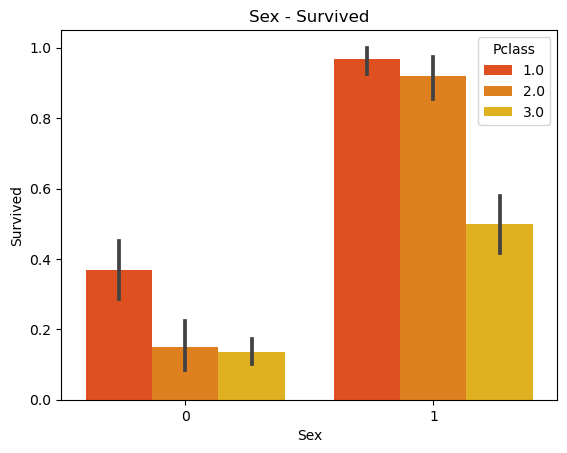

In [9]:
sns.barplot(x='Sex', y='Survived', hue='Pclass', data=df, palette='autumn')
plt.title('Sex - Survived')
plt.show()

Another useful type of visualization is the box plot box. Let's look at a box plot that reflects the distribution of passengers by gender and age.

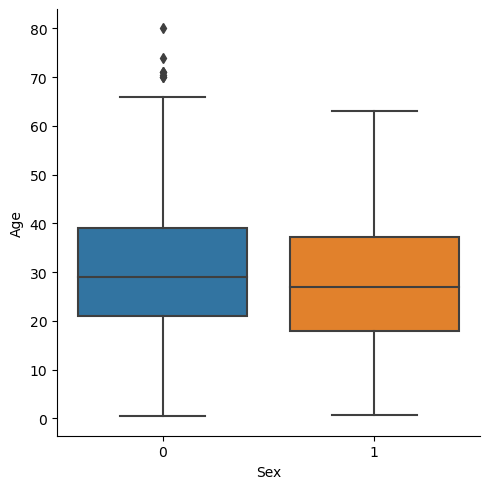

In [10]:
sns.catplot(x="Sex", y="Age", data=df, kind="box")
plt.show()

We can detail the picture by adding Pclass separation.

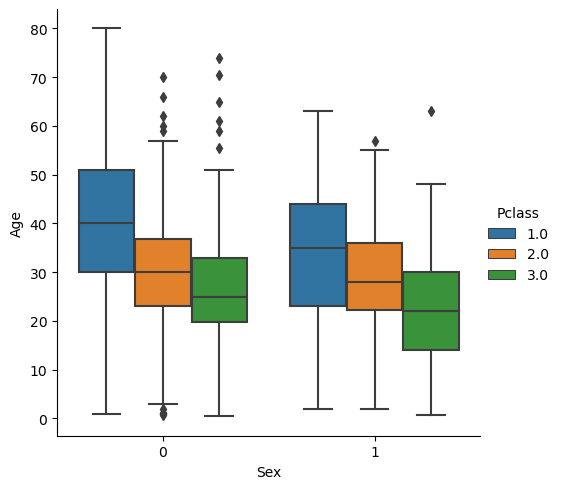

In [11]:
sns.catplot(x="Sex", y="Age",hue ="Pclass", data=df, kind="box")
plt.show()

## Process the 'Embarked' feature

In [12]:
print(df['Embarked'].value_counts(dropna=False))
df.shape

S      641
C      168
Q       75
NaN      2
Name: Embarked, dtype: int64


(886, 12)

### Task 6
Remove passengers from the table for whom the port of embarkation (Embarked) is unknown.

In [13]:
df = df.dropna(subset=['Embarked'])
print("New Dimensions", df.shape)

New Dimensions (884, 12)


Let's convert the categorical column to numeric columns using One-Hot Encoding, namely, create three numeric columns as follows:

In [14]:
# df['EmbS'] = df.apply(lambda row: 1 if row.Embarked == 'S' else 0, axis=1)
# df['EmbC'] = df.apply(lambda row: 1 if row.Embarked == 'C' else 0, axis=1)
# df['EmbQ'] = df.apply(lambda row: 1 if row.Embarked == 'Q' else 0, axis=1)

This operation can be done using the `get_dummies` method.

In [15]:
pd.get_dummies(df['Embarked'])

,C,Q,S
0,0,0,1
1,1,0,0
2,0,0,1
3,0,0,1
4,0,0,1
...,...,...,...
886,0,0,1
887,0,0,1
888,0,0,1
889,1,0,0


### Task 7
Remove the categorical column `Embarked` from the table and add new columns to it, obtained using `get_dummies`.

In [16]:
embarked_dummies = pd.get_dummies(df['Embarked'], prefix='Emb')

df = pd.concat([df, embarked_dummies], axis=1)
df.drop('Embarked', axis=1, inplace=True)

print(df.head())

   PassengerId  Survived  Pclass  \
0          1.0       0.0     3.0   
1          2.0       1.0     1.0   
2          3.0       1.0     3.0   
3          4.0       1.0     1.0   
4          5.0       0.0     3.0   

                                                Name  Sex   Age  SibSp  Parch  \
0                            Braund; Mr. Owen Harris    0  22.0    1.0    0.0   
1  Cumings; Mrs. John Bradley (Florence Briggs Th...    1  38.0    1.0    0.0   
2                             Heikkinen; Miss. Laina    1  26.0    0.0    0.0   
3       Futrelle; Mrs. Jacques Heath (Lily May Peel)    1  35.0    1.0    0.0   
4                           Allen; Mr. William Henry    0  35.0    0.0    0.0   

             Ticket     Fare Cabin  Emb_C  Emb_Q  Emb_S  
0         A/5 21171   7.2500   NaN      0      0      1  
1          PC 17599  71.2833   C85      1      0      0  
2  STON/O2. 3101282   7.9250   NaN      0      0      1  
3            113803  53.1000  C123      0      0      1  
4     

## Process the 'Age' feature

Check if `Age` has any missing values.

In [17]:
df.Age.isna().sum()

175

Let's fill in the blanks with the median `Age` value.

In [18]:
median_age = df['Age'].median()

df['Age'].fillna(median_age, inplace=True)

Let's plot the age distribution of the passengers.

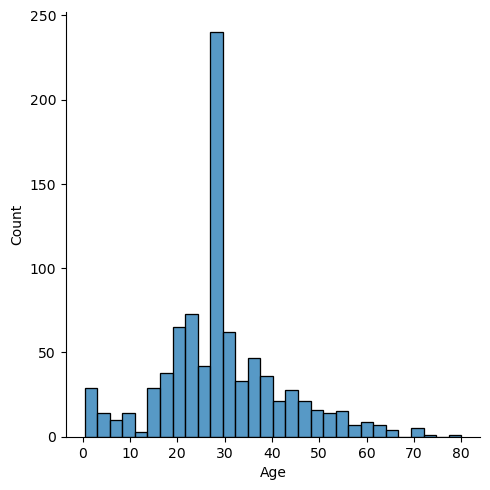

In [19]:
sns.displot(df['Age'], kde=False)
plt.show()

We can also look at the age distribution of `Pclass`.

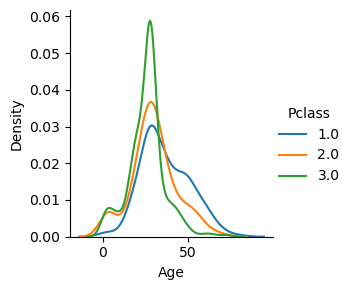

In [20]:
facet = sns.FacetGrid(data=df, hue="Pclass", legend_out=True)
facet = facet.map(sns.kdeplot, "Age")
facet.add_legend();

### Process the 'Fare' feature

1) Check if there are any missing values in `Fare`

2) If there are missing values, fill them with the _median_ value of `Fare`

In [21]:
print("Missing in Fare:", df['Fare'].isna().sum())

if df['Fare'].isna().sum() > 0:
    median_fare = df['Fare'].median()
    df['Fare'].fillna(median_fare, inplace=True)
    print("Filled missing 'Fare' values:", median_fare)


Missing in Fare: 0


### Process the 'Pclass' feature

Are there any missing values in `Pclass`?

In [22]:
print("Missing values in 'Pclass':", df['Pclass'].isna().sum())
print(df['Pclass'].value_counts(dropna=False))


Missing values in 'Pclass': 0
3.0    487
1.0    214
2.0    183
Name: Pclass, dtype: int64


### Task 8
Draw a histogram of survival rates as a function of `Pclass`.

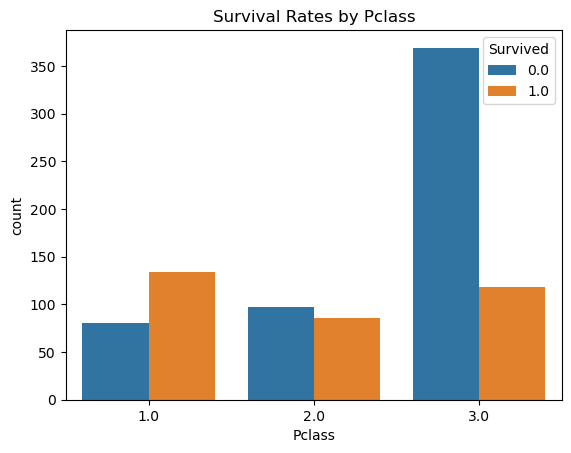

In [23]:
sns.countplot(x='Pclass', hue='Survived', data=df)
plt.title('Survival Rates by Pclass')
plt.show()


### Process the feature 'SibSp' (number of siblings, husbands, wives)

Are there any missing values in `SibSp`?

In [24]:
missing_sibsp = df['SibSp'].isna().sum()
print(f"Missing values in 'SibSp': {missing_sibsp}")


Missing values in 'SibSp': 0


### Task 9
The `PassengerId` column is categorical and does not carry important information, delete it.

In [25]:
df.drop('PassengerId', axis=1, inplace=True)
print("Updated DataFrame:")
print(df.head())


Updated DataFrame:
   Survived  Pclass                                               Name  Sex  \
0       0.0     3.0                            Braund; Mr. Owen Harris    0   
1       1.0     1.0  Cumings; Mrs. John Bradley (Florence Briggs Th...    1   
2       1.0     3.0                             Heikkinen; Miss. Laina    1   
3       1.0     1.0       Futrelle; Mrs. Jacques Heath (Lily May Peel)    1   
4       0.0     3.0                           Allen; Mr. William Henry    0   

    Age  SibSp  Parch            Ticket     Fare Cabin  Emb_C  Emb_Q  Emb_S  
0  22.0    1.0    0.0         A/5 21171   7.2500   NaN      0      0      1  
1  38.0    1.0    0.0          PC 17599  71.2833   C85      1      0      0  
2  26.0    0.0    0.0  STON/O2. 3101282   7.9250   NaN      0      0      1  
3  35.0    1.0    0.0            113803  53.1000  C123      0      0      1  
4  35.0    0.0    0.0            373450   8.0500   NaN      0      0      1  
